<a href="https://colab.research.google.com/github/BrittonWinterrose/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Britton Winterrose 
# Linear Regression Sprint Challenge
# LS-DS1-Sprint-02-Day05

## I'll import all my data and check for NaN's before starting the questions. 

In [1]:
# Import everything you could ever need. ;)
#!pip install seaborn --upgrade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#pd.set_option('chop_threshold', 0.001)
#pd.set_option('precision',4)

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.describe()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
count,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000
mean,46.535491,16185.453305,2.302295,141.744202,2.568337,1.650618,0.941613,2006.500883,0.575868
std,24.526251,24449.641512,1.610307,97.464062,5.387238,1.341282,0.234488,6.925907,0.741235
min,0.000000,259.350000,0.000000,0.000000,0.100000,0.000000,0.000000,1959.000000,0.000000
25%,23.000000,5490.000000,1.000000,74.000000,1.600000,0.000000,1.000000,2004.000000,0.000000
50%,50.000000,9500.000000,3.000000,130.000000,2.000000,1.000000,1.000000,2008.000000,0.000000
75%,68.000000,17145.600000,3.000000,197.000000,2.500000,3.000000,1.000000,2011.000000,1.000000
max,82.000000,547800.000000,5.000000,999.000000,99.990000,3.000000,1.000000,2016.000000,2.000000


In [3]:
# Quick check for missing data
total_NaNs = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_NaNs, percent], axis=1, keys=['# of NaN', 'Percent'])

print("Any missing data?\n")
print(missing_data.head(20).T)
print("\nNope! Looks good to go!")

Any missing data?

          drive  year  registration  engType  engV  mileage  body  price  make
# of NaN    0.0   0.0           0.0      0.0   0.0      0.0   0.0    0.0   0.0
Percent     0.0   0.0           0.0      0.0   0.0      0.0   0.0    0.0   0.0

Nope! Looks good to go!


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [4]:
X = df.drop('price', axis=1)
y = df.price

print(f'X Shape {X.shape}')
print(f'y Shape {y.shape}')

X Shape (8495, 8)
y Shape (8495,)


## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
# Split into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8, random_state=42)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [6]:
# fit model using train datasets
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [7]:
# report the intercept and coefficient values
print ("The fitted model has... \n")
coef_table = pd.DataFrame([list(model.coef_)],columns=list(X.columns),index=['Coef'])
print(f"coefficients:\n{coef_table}\n")
print("intercept: ", model.intercept_)

The fitted model has... 

coefficients:
           make         body    mileage        engV     engType  registration        year        drive
Coef -28.005423 -1978.466409 -37.495604  272.999564 -1213.01659    3344.57225  1179.02495  8864.153345

intercept:  -2344950.7148892586


## 1.5 Use the test data to make predictions

In [0]:
# Create new predictions using x_test
y_pred = model.predict(X_test)

## 1.6 Calculate and report both the Root-Mean-Square error and R^2 for the model. 

In [9]:
# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(y_test, y_pred)))
R2 = r2_score(y_test, y_pred)


print('RMSE of {}'.format(RMSE))
print('R^2 of {}'.format(R2))

RMSE of 20507.498436538972
R^2 of 0.28572767034795343


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

The coefficient of the year value, "1179.025 x Year" means that we expect a $1179.025 dollar increase in price for each year older a car is. 

## 1.8 How should we interpret the Root-Mean-Square Error?

The RMSE of $20,507 is high. 

RMSE can be interpreted as the standard deviation of the unexplained variance. 

Because our mean is $16185.45, this RMSE would suggest that our price is not a normal distribution. 

## 1.9 How should we interpret the R^2?

R^2 of 0.28 means that only 28% of the change in price can be accounted for using our model as it is currently fitted. Much of our data, infact the vast majority of it is not described by this model as present. 

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

Skewness: 7.209567
Kurtosis: 95.840296


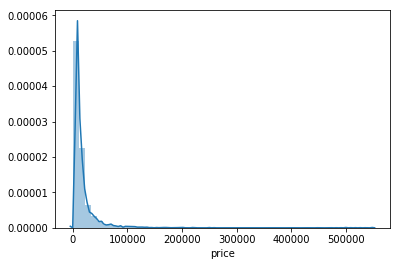

In [10]:
#descriptive statistics summary
df['price'].describe()

# I want to look at our Y value first by plotting in a histogram
sns.distplot(df['price']);

#skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

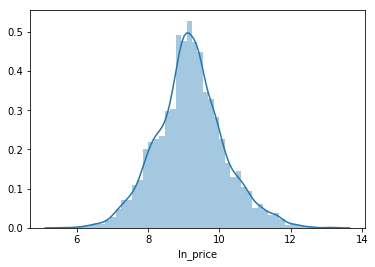

In [11]:
# Yep definitely needs to be log adjusted. 
# Log transform the data to normalize price.  
df['ln_price'] = np.log(df['price'])
sns.distplot(df['ln_price']);

Wow! That looks much better. Let's test it. 

In [12]:
X = df.drop(['price','ln_price'], axis=1)
y = df.ln_price

print(f'X Shape {X.shape}')
print(f'y Shape {y.shape}')

def myRegression(X,y):
  # Split into test and train datasets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8, random_state=42)

  # fit model using train datasets
  model = LinearRegression()
  model.fit(X_train, y_train)

  # Print the report. 
  print ("The fitted model has... \n")
  coef_table = pd.DataFrame([list(model.coef_)],columns=list(X.columns),index=['Coef'])
  print(f"coefficients:\n{coef_table}\n")
  print(f"intercept: {model.intercept_}\n")
  # Create new predictions using x_test
  y_pred = model.predict(X_test)

  # Measure Accuracy using y_test and y_pred
  RMSE = (np.sqrt(mean_squared_error(y_test, y_pred)))
  R2 = r2_score(y_test, y_pred)

  print(f'RMSE: {RMSE}\n')
  print(f'R^2: {R2}\n')

print("\n Here's the log-linear regression model!")
myRegression(X,y)

X Shape (8495, 8)
y Shape (8495,)

 Here's the log-linear regression model!
The fitted model has... 

coefficients:
          make      body   mileage      engV   engType  registration      year     drive
Coef -0.000839 -0.080871 -0.000112  0.007127 -0.061841      0.618597  0.093972  0.431258

intercept: -179.8696260745638

RMSE: 0.5659041123110102

R^2: 0.6554633333320435



## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

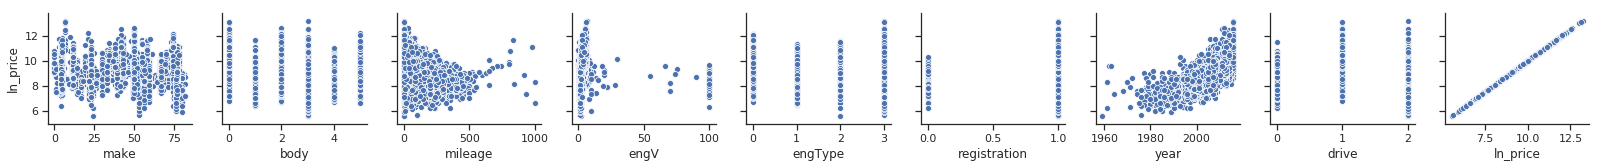

In [13]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop('price')

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=df, y_vars=['ln_price'], x_vars=x_columns)

## 2.3 If appropriate, create any polynomial features. 

### I'll inspect residuals to help make this decision. 

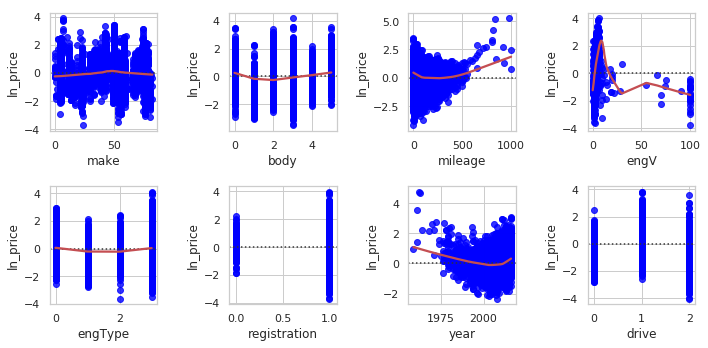

In [14]:
# I'm going to check for residuals then I'll do any polynomials Ineed. 
#There are 8 columns in X
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(10,5));
X = df.drop('price',axis=1)
y = df.ln_price

# Positions in the array of axes that I just made
position_list = []
for i in range(2):
    for j in range(4):
        position_list.append((i,j))
        
for col, pos in zip(X.columns, position_list):
    sns.residplot(X[col], y, lowess=True, color="r", ax=axs[pos[0]][pos[1]],
                  scatter_kws={'color':'blue'})
plt.tight_layout()

Now lets look at how our plots changed.


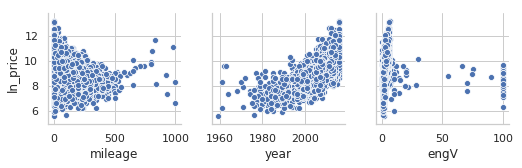

In [15]:
# Mileage, year, and engV look like our best candidates for converting to polynomial features.
# These demostrate the most severe levels of Heteroskedasticity.

# Creating polynomial features. 
df['mileage_squared'] = df['mileage']**2
df['year_squared'] = df['year']**2
df['engV_squared'] = df['engV']**2

print('Now lets look at how our plots changed.')
# Generate a list of column headers not including price
x_columns = ['mileage','year','engV']

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=df, y_vars=['ln_price'], x_vars=x_columns)

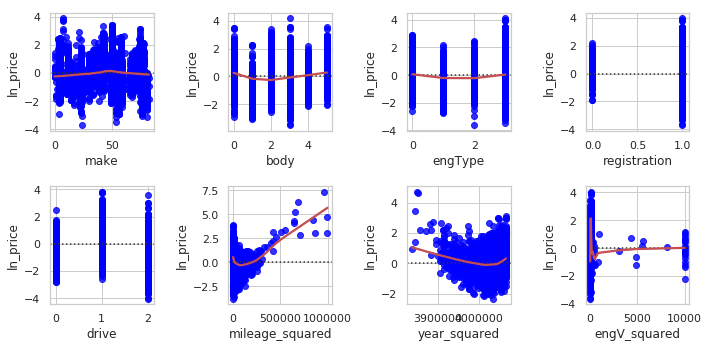

In [16]:
# Inspecting residuals after changes 
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(10,5));
X = df.drop(['ln_price','price','mileage','year','engV'],axis=1)
y = df.ln_price


# Positions in the array of axes that I just made
position_list = []
for i in range(2):
    for j in range(4):
        position_list.append((i,j))
        
for col, pos in zip(X.columns, position_list):
    sns.residplot(X[col], y, lowess=True, color="r", ax=axs[pos[0]][pos[1]],
                  scatter_kws={'color':'blue'})
plt.tight_layout()

These look good! The residual lines follow the data much more accurately than before. 

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and R^2.

In [17]:
X = df.drop(['ln_price','price','mileage','year','engV'], axis=1)
y = df.ln_price
print("The log-transformed y variable model with new polynomial features!")

myRegression(X,y)

The log-transformed y variable model with new polynomial features!
The fitted model has... 

coefficients:
          make      body   engType  registration     drive  mileage_squared  year_squared  engV_squared
Coef -0.000833 -0.084468 -0.057537      0.627454  0.435089     8.128146e-07      0.000024     -0.000018

intercept: -88.65510701557318

RMSE: 0.5680475495926016

R^2: 0.652848433422434



## 2.5 How might we interpret the coefficient on "year" in this new regression model?

Each change in year_squared would see a 0.000024 percent change in the ln_price. 

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient descent is a way to minimize an objective cost function of a model's parameters by updating the parameters in the opposite direction of the gradient of the objective cost function. Thus with each iteration the cost function gets progressively smaller and the model's parameters values converge on an optimize solution. In other words, we follow the direction of the slope of the surface created by the objective function downhill until we reach locally optimal valley. 
 
There are many 3 primary types of gradient descent:
Batch gradient descent minimizes cost function by applying the gradient to the entire dataset, then checking the the loss from the cost function, then it updates all dataset's parameters at once, and then proceeds to the next iteration until it converges on an minimum. (When the gradient loss = 0).
 
Stochastic gradient descent calculates the gradient on each variable, and then updates the parameter immediately before moving to the next variable. Because it is done on one variable at a time it can be run on online data, i.e. data flowing from a source, instead of needing a batch of data to run. This is part of why it is so widely used. It also is fast, and has a ton of variants that manipulate the step behavior to allow it to perform better in varied circumstances where batch gradient descent would either fail to converge or would incorrectly converge. (non-convex surfaces.)
 
Mini-batch gradient descent takes both approaches and merges them performing a batch gradient descent for every n number of training examples. It provides the best of both worlds being both fast and accurate. 


## 3.2 What is the "Learning Rate" and what is its function?

 The learning rate η determines the size of the steps of each step on it's journey to reach a (local) minimum. It essentially determines how much we adjust the parameters for each cycle the gradient evaluation function runs. 
 
 It allows us to take bigger steps when we're far from optimal and smaller steps as we get progressively closer to the optimal minimum. 

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [18]:
# Run a log-polynomial linear regression with robust standard errors using statsmodels.

# Define X & y
X = df.drop(['ln_price','price','mileage','year','engV'], axis=1)
y = df.ln_price

# Use Statsmodels to run a regression
# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

# Lets run our regression again using Robust Standard Errors
# cov_type='HC3' parameter to .fit() function
# Log-Linear polynomial Regression
# This is like using np.ones to add a vector of ones

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     1634.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        19:08:17   Log-Likelihood:                -7190.0
No. Observations:                8495   AIC:                         1.440e+04
Df Residuals:                    8486   BIC:                         1.446e+04
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -88.2822      1.582    -

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [19]:
# Calculate the (VIF) for the X Variables.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_print = pd.DataFrame([vif], columns=list(X.columns),index=['VIF'])

print("Any VIF values > 10?\n *The rule of thumb is any feature w/ VIF>10 is out!*\n")
print(vif_print)
print("\nNope! Looks good to go! No multicolinearity problems here.")


Any VIF values > 10?
 *The rule of thumb is any feature w/ VIF>10 is out!*

            const      make      body   engType  registration     drive  mileage_squared  year_squared  engV_squared
VIF  27273.866746  1.057798  1.128627  1.106578      1.082825  1.125851         1.253906      1.286065      1.002524

Nope! Looks good to go! No multicolinearity problems here.


The rule of thumb for VIF is that if VIF is greater than 10 then it likely has a multicollinearity issue. This is because any small change to a multicollinear set of X variables will have a much greater impact on the Y-outcomes than they would if they were indepentent variables. Its effectively measureing to make sure nothing is double counting.  This is a great way to check your work when doing inferential regression modeling. 

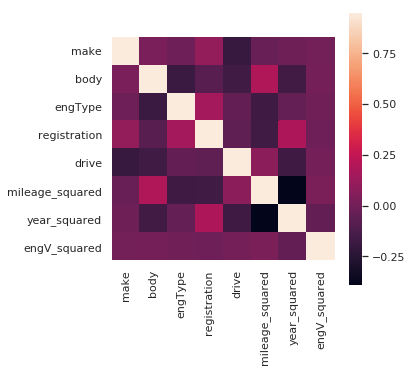

In [20]:
# Just to inspect it visually as well I'll check the Corrilation Matrix

no_const = X.drop('const', axis=1)
corr_matrix = no_const.corr()
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr_matrix, vmax=.95, square=True);

As you can see in the Corrilation Matrix all these features are far from being multicollinear. This is indicated by the difference in color between the diagonal axis from the top left to bottom right. The light colored diagonal is perfectly collinear because it is comparing the corrilation between a single feature vs itself. 

### NO MULTICOLINEARITY PROBLEMS!!!! 
